# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Friday, May 2 at 11 – 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2252_data_3402_001-NLyiqHJ5btv8Y/Shared%20Documents/General/Kaggle%20Tabular%20Datasets.xlsx?d=w34cdd3378d1146a2ab63700189a8c5b5&csf=1&web=1&e=6ASD5s). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Project link: https://www.kaggle.com/datasets/gallo33henrique/bioinformatics-protein-dataset-simulated?select=proteinas_test.csv
* Challenge description: The Kaggle project involves a binary classification task using a simulated bioinformatics protein dataset. The main challenge is to develop a machine learning model that is able to accurately predict, based on its various simulation features, whether a given protein belongs to a specific class (possibly a disease-related or functional category). This classification is a common problem in bioinformatics, where identifying proteins with specific properties is critical to research and drug discovery.
 
* Data description:The dataset contains simulated protein data intended for a multi-class classification task. It includes 20,000 synthetic proteins split into a training set of 16,000 samples (proteinas_train.csv) and a test set of 4,000 samples (proteinas_test.csv). Each protein is characterized by an ID_Protein, its amino acid Sequence, and several calculated physicochemical properties: Molecular_Weight, Isoelectric_Point, Hydrophobicity, Total_Charge, Polar_Proportion, Nonpolar_Proportion, and Sequence_Length. The target variable is Class, which categorizes each protein into one of five functional classes: Enzyme, Transport, Structural, Receptor, or Other. Although the data is synthetic, it is based on real protein data sets and aims to mimic the patterns observed in them, making it suitable for exploring machine learning methods in bioinformatics. The features provide quantitative descriptions of the protein's composition and characteristics that can be used to predict its functional class.


## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
!mkdir Train
!mv proteinas_train.csv Train/
!mv proteinas_test.csv Train/
!mv proteinas_20000_enriquecido.csv Train/
!ls Train

mkdir: cannot create directory ‘Train’: File exists
mv: cannot stat 'proteinas_train.csv': No such file or directory
mv: cannot stat 'proteinas_test.csv': No such file or directory
mv: cannot stat 'proteinas_20000_enriquecido.csv': No such file or directory
proteinas_test.csv  proteinas_train.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Train/proteinas_train.csv")
print("***** Train/proteinas_train.csv loaded successfully *****")
df.head()

***** Train/proteinas_train.csv loaded successfully *****


,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,TRAIN_P00001,GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...,20362.9468,4.866123,0.149425,-3,0.241379,0.408046,174,Estrutural
1,TRAIN_P00002,LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSR...,9328.7909,6.298636,0.217105,0,0.210526,0.513158,76,Estrutural
2,TRAIN_P00003,PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLF...,17616.3852,8.458977,0.192568,8,0.141892,0.466216,148,Estrutural
3,TRAIN_P00004,GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRF...,35244.2968,8.448340,0.160473,21,0.189189,0.408784,296,Estrutural
4,TRAIN_P00005,HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLI...,34557.9931,7.696306,0.140411,18,0.202055,0.380137,292,Receptora


- **`ID_Proteína`**- Identifier for each protein.
- **`Sequência`**- The amino acid sequence of the protein.
- **`Massa_Molecular`**- The molecular mass of the protein.
- **`Ponto_Isoelétrico`** The isoelectric point of the protein.
- **`Hidrofobicidade`**-  A measure of the protein's hydrophobicity.
- **`Carga_Total`**- The total charge of the protein.
- **`Proporção_Polar`**- The proportion of polar amino acids in the sequence.
- **`Proporção_Apolar`**- The proportion of non-polar amino acids.
- **`Comprimento_Sequência`**- The length of the amino acid sequence.
- **`Classe`** (TARGET VARIABLE)- The class or category of the protein (e.g., Estrutural', 'Receptora', 'Enzima'). 

In [3]:
df_test = pd.read_csv("Train/proteinas_test.csv")
df_test.head()

,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,TEST_P00001,QWPPEVSNGFQSEGKCRWWFIMDPEKPRFHAHAAFHMPDVFRVHYP...,32373.5883,8.466520,0.143657,20,0.167910,0.388060,268,Receptora
1,TEST_P00002,DQGPKNYEYTRQLPCNCCEIMCCDKTNQKSDEVQAAGMTCDKFQHK...,16404.3504,6.558333,0.095070,4,0.225352,0.323944,142,Enzima
2,TEST_P00003,CMAPAVKGESGANKECRPCQDWLYTAPGGMCDICSSTVCCYNYAYE...,19611.2902,7.084207,0.137725,6,0.209581,0.377246,167,Enzima
3,TEST_P00004,KKKHPHILFTFGTMQWIVVKRHAVLMSKVFWRMERQWVNIHYSCDE...,23563.3112,8.716335,0.194301,14,0.181347,0.461140,193,Estrutural
4,TEST_P00005,LMKTRNLLWRGYWWQSPGNLYTFHCDLVCHRFMAPVNFHRECFRTE...,19124.5587,8.398828,0.161491,12,0.285714,0.385093,161,Estrutural


In [4]:
num_rows = df.shape[0]
num_features = df.shape[1]

print(f"Number of rows (data points): {num_rows}")
print(f"Number of features (columns):{num_features}")

Number of rows (data points): 16000
Number of features (columns):10


In [5]:
df.isnull() # missing values

,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15995,False,False,False,False,False,False,False,False,False,False
15996,False,False,False,False,False,False,False,False,False,False
15997,False,False,False,False,False,False,False,False,False,False
15998,False,False,False,False,False,False,False,False,False,False


In [6]:
np.any(df.isnull()) # test for null values

np.False_

In [7]:
np.any(df_test.isnull())

np.False_

In [8]:
df.shape

(16000, 10)

In [9]:
df_test.shape

(4000, 10)

In [10]:
print("***** Missing values in training data *****")
print(df.isnull().sum())

***** Missing values in training data *****
ID_Proteína              0
Sequência                0
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
Classe                   0
dtype: int64


In [11]:
print("***** Missing values in test data *****")
print(df_test.isnull().sum())

***** Missing values in test data *****
ID_Proteína              0
Sequência                0
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
Classe                   0
dtype: int64


In [12]:
unique_classes= df['Classe'].unique()
print("Unique classes in the 'Classe'column:")
print(unique_classes)

Unique classes in the 'Classe'column:
['Estrutural' 'Receptora' 'Enzima' 'Transporte' 'Outras']


**Not a binary classification. There are 5 classes:**
- Estrutural(Structural)
- Receptora(Receptor)
- Enzima(Enzyme)
- Tranporte(Transport)
- Outras(Others).

In [13]:
feature_analysis = []
for col in df.columns:
    feature_info = {'Feature Name': col}
    feature_info['Data Type'] = df[col].dtype
    
    if df[col].dtype == 'object':
        feature_info['Unique Values'] = df[col].nunique()
        feature_info['Example Values'] = ', '.join(df[col].unique()[:5].astype(str)) + ('...' if df[col].nunique() > 5 else '')
        feature_info['Is Categorical'] = True
        feature_info['Is Numerical'] = False
    else:
        feature_info['Min Value'] = df[col].min()
        feature_info['Max Value'] = df[col].max()
        feature_info['Unique Values'] = df[col].nunique()
        feature_info['Is Categorical'] = False
        feature_info['Is Numerical'] = True
        

    feature_info['Missing Values'] = df[col].isnull().sum()
    feature_analysis.append(feature_info)

analysis_df = pd.DataFrame(feature_analysis)

In [14]:
analysis_df

,Feature Name,Data Type,Unique Values,Example Values,Is Categorical,Is Numerical,Missing Values,Min Value,Max Value
0,ID_Proteína,object,16000,"TRAIN_P00001, TRAIN_P00002, TRAIN_P00003, TRAI...",True,False,0,NaN,NaN
1,Sequência,object,16000,GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...,True,False,0,NaN,NaN
2,Massa_Molecular,float64,16000,NaN,False,True,0,5463.212900,37588.751700
3,Ponto_Isoelétrico,float64,14306,NaN,False,True,0,4.050028,11.711987
4,Hidrofobicidade,float64,4604,NaN,False,True,0,0.014563,0.284314
5,Carga_Total,int64,61,NaN,False,True,0,-20.000000,47.000000
6,Proporção_Polar,float64,3277,NaN,False,True,0,0.049180,0.380282
7,Proporção_Apolar,float64,3833,NaN,False,True,0,0.200000,0.607843
8,Comprimento_Sequência,int64,251,NaN,False,True,0,50.000000,300.000000
9,Classe,object,5,"Estrutural, Receptora, Enzima, Transporte, Outras",True,False,0,NaN,NaN


 * Categorical Features: ID_Proteína, Sequência, and Classe.

 * Numerical Features: Massa_Molecular, Ponto_Isoelétrico, Hidrofobicidade, Carga_Total, Proporção_Polar, Proporção_Apolar, and Comprimento_Sequência are numerical.

 * Missing Values: There are no missing values in any of the columns.

 * Target Variable: The column Classe is the target variable. It is categorical, and has 5 unique values: 'Estrutural', 'Receptora', 'Enzima', 'Transporte', and 'Outras'.

In [15]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from IPython.display import HTML, display
from tabulate import tabulate

html_table = tabulate(analysis_df, headers='keys', tablefmt='html',showindex=False)
display(HTML(html_table))

Feature Name,Data Type,Unique Values,Example Values,Is Categorical,Is Numerical,Missing Values,Min Value,Max Value
ID_Proteína,object,16000,"TRAIN_P00001, TRAIN_P00002, TRAIN_P00003, TRAIN_P00004, TRAIN_P00005...",True,False,0,nan,nan
Sequência,object,16000,"GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFCYPGSKRTMHPMWQSSDDCANCGTYWMGWDSPIQETEYRWMMDWITMESDALAGRNCCVMNMDWVRSCSSWTHIKSYLTGMNYMAMTFQFVDGDFNDQSLVCMDIWNFPSIATATKPYQFFTLPHVVWK, LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSREWCPVCTYCYWFVERRVWTTDSTEACCFNC, PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLFIAIDWISTYIPLKPVAWCLYSIRYCVGQPAFEWESGNCKDRVLFMIWFDDSKNVTFKQPAQDMHCRAVQVMPAGLSCHRATFMCPVPPRKCWMEWNSTDVVF, GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRFVKWFDCYGSDCTYKWHSDIHGSWSRCCQEAWTMFKHKVTRMLLSWVMCNICFNWCSKEDHLIMFAYFLDMTRPEQDHTTKFCHLAYRCENKAYFTGCFDRCLAMDTIVFDQQQIKTDSQMRMPMAAFYGRHPNSSACFKMNGAHMWASFYTPCHGKFNPMHHCFLAPSAYMWILAQGDFFDMEVEIWDQSWWSGFNRFWYSLETMGDPIVNNCMWPQSRRACLYDPGPPFYYSQNFDVHMRRARSEWMFK, HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLIHHFPMTVKAKAFGRFTCQRTVVVGEKGYVILKNSRQHTVNDCDDQIQERKLRNFGIYLPYYSIQNQQNETMGHWKQPETVSTYPQATSFSLWTVEPANWFMQGYVCKRDILGEPSLGFFGNLRKLCAKGLEPFQDRWGQECQRCSYTWSNEDEHLHASKWRQDGYEERDQKGHPASFEAYQKFTHTWDFCWDYSLYTWWPYMERDYHKQGQMKMHEALVHCSPHFLFTGIGKTYEGQCVMCIIMRF...",True,False,0,nan,nan
Massa_Molecular,float64,16000,nan,False,True,0,5463.21,37588.8
Ponto_Isoelétrico,float64,14306,nan,False,True,0,4.05003,11.712
Hidrofobicidade,float64,4604,nan,False,True,0,0.0145631,0.284314
Carga_Total,int64,61,nan,False,True,0,-20,47
Proporção_Polar,float64,3277,nan,False,True,0,0.0491803,0.380282
Proporção_Apolar,float64,3833,nan,False,True,0,0.2,0.607843
Comprimento_Sequência,int64,251,nan,False,True,0,50,300
Classe,object,5,"Estrutural, Receptora, Enzima, Transporte, Outras",True,False,0,nan,nan


* The table summarizes the characteristics of each column in proteinas_train.csv

In [17]:
# Load dataset
def load_protein_dataset(file_path="Train/proteinas_train.csv"):
    """Loads the protein training dataset. """

    df_train = pd.read_csv(file_path)
    return {"Training": df_train} # returns DF in a dictionary 

#Loads protein training data
protein_data = load_protein_dataset()

if protein_data:
    df_protein = protein_data["Training"]
    print("proteinas_train.csv loaded successfully.")
    df_protein.head()

proteinas_train.csv loaded successfully.


In [18]:
# features based on properties 
numerical_features_list = list(analysis_df[analysis_df['Is Numerical'] == True]['Feature Name'])
numerical_features_list

['Massa_Molecular',
 'Ponto_Isoelétrico',
 'Hidrofobicidade',
 'Carga_Total',
 'Proporção_Polar',
 'Proporção_Apolar',
 'Comprimento_Sequência']

In [19]:
# categorical names
categorical_features_list = list(analysis_df[analysis_df['Is Categorical'] == True]['Feature Name'])
categorical_features_list

['ID_Proteína', 'Sequência', 'Classe']

In [20]:
df_protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Proteína            16000 non-null  object 
 1   Sequência              16000 non-null  object 
 2   Massa_Molecular        16000 non-null  float64
 3   Ponto_Isoelétrico      16000 non-null  float64
 4   Hidrofobicidade        16000 non-null  float64
 5   Carga_Total            16000 non-null  int64  
 6   Proporção_Polar        16000 non-null  float64
 7   Proporção_Apolar       16000 non-null  float64
 8   Comprimento_Sequência  16000 non-null  int64  
 9   Classe                 16000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [21]:
feature_types = []
for col in df_protein.columns:
    if df_protein[col].dtype == 'object':
        feature_types.append((col, True))  # Categorical
    else:
        feature_types.append((col, False)) # Numerical

print(feature_types)

[('ID_Proteína', True), ('Sequência', True), ('Massa_Molecular', False), ('Ponto_Isoelétrico', False), ('Hidrofobicidade', False), ('Carga_Total', False), ('Proporção_Polar', False), ('Proporção_Apolar', False), ('Comprimento_Sequência', False), ('Classe', True)]


In [22]:
print(df_protein.columns)

Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe'],
      dtype='object')


In [23]:
print(df_protein["Classe"].value_counts())

Classe
Enzima        3235
Estrutural    3232
Transporte    3225
Outras        3183
Receptora     3125
Name: count, dtype: int64


## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

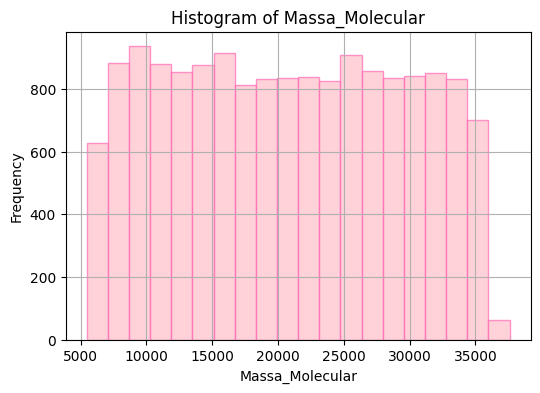

In [25]:
first_numerical_feature = numerical_features_list[0] # Get name of the first numerical feature.

plt.figure(figsize=(6,4))
plt.hist(df_protein[first_numerical_feature], bins=20, edgecolor='hotpink', color='pink', alpha=0.7)
plt.title(f"Histogram of {first_numerical_feature}")
plt.xlabel(first_numerical_feature)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [26]:
import math
import scipy.stats

def compare_protein_features(df, target_col='Classe', logscale=False):
    """
    Compare feature distributions across protein classes with KS testing.
    Handles multiple classes by comparing each against all others.
    """
    classes = df[target_col].unique()
    print(f"Classes found: {classes}")
    
    # Select only numerical features
    numerical_features = [
        'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 
        'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 
        'Comprimento_Sequência'
    ]
    
    # Create plot grid
    n_features = len(numerical_features)
    n_cols = math.ceil(math.sqrt(n_features))
    n_rows = math.ceil(n_features / n_cols)
    
    plt.figure(figsize=(5*n_cols, 4*n_rows))

    
    # Get a distinct color for each class
    colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))
    
    for i, feature in enumerate(numerical_features):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Plot histogram for each class
        for cls, color in zip(classes, colors):
            subset = df[df[target_col] == cls]
            plt.hist(subset[feature], bins=50, histtype="step",
                    color=color, label=cls, density=True)
        
        # calculate max KS statistic between any two classes
        ks_stats = []
        for j in range(len(classes)):
            for k in range(j+1, len(classes)):
                stat = scipy.stats.kstest(
                    df[df[target_col] == classes[j]][feature],
                    df[df[target_col] == classes[k]][feature]
                ).statistic
                ks_stats.append(stat)
        max_ks = max(ks_stats) if ks_stats else 0
        
        plt.title(f"{feature}\nMax KS={max_ks:.3f}", fontsize=10)
        plt.xlabel(feature)
        plt.legend(fontsize=8)
        if logscale:
            plt.yscale("log")
    
    plt.tight_layout()
    plt.show()


Classes found: ['Estrutural' 'Receptora' 'Enzima' 'Transporte' 'Outras']


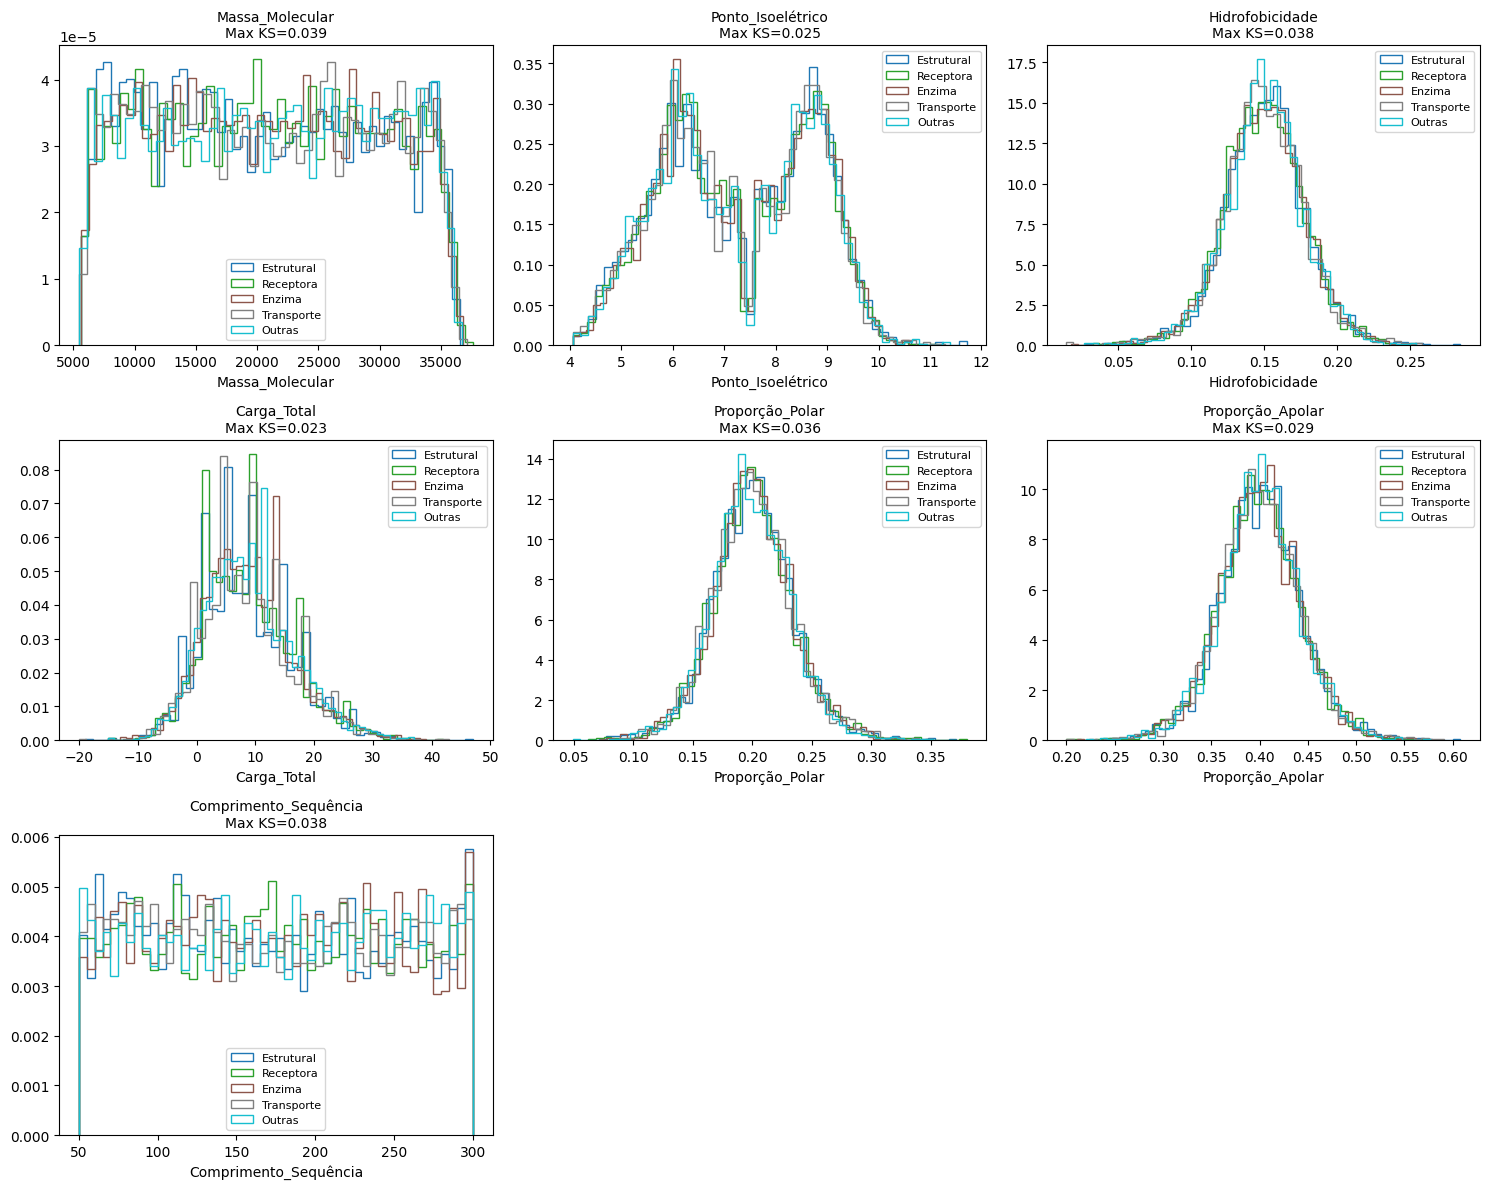

In [86]:
# Run the analysis
compare_protein_features(df_protein)

The function provides a quantitative measure of the separability between the classes for each feature by calculating and displaying the maximum KS statistic.

In [87]:
# Example: Rank features by maximum KS statistics
import pandas as pd
df_protein = pd.read_csv("Train/proteinas_train.csv")

def feature_ranking(df, numerical_features, target_col='Classe'):
    """
    Ranks numerical features by the maximum KS statistic between any two classes.
    """
    classes = df[target_col].unique()
    feature_importance = {}

    for feature in numerical_features:
        max_ks = 0
        for i in range(len(classes)):
            for j in range(i + 1, len(classes)):
                group1 = df[df[target_col] == classes[i]][feature]
                group2 = df[df[target_col] == classes[j]][feature]
                if len(group1) > 1 and len(group2) > 1:
                    ks_stat = scipy.stats.kstest(group1, group2).statistic
                    max_ks = max(max_ks, ks_stat)
        feature_importance[feature] = max_ks

    sorted_features = sorted(feature_importance.items(), key=lambda x: -x[1])
    print("Feature ranking by discriminative power (Max KS):")
    
    for feat, ks in sorted_features:
        print(f"{feat}: {ks:.3f}")


numerical_features = [
    'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade',
    'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
    'Comprimento_Sequência'
]

feature_ranking(df_protein, numerical_features)

Feature ranking by discriminative power (Max KS):
Massa_Molecular: 0.039
Hidrofobicidade: 0.038
Comprimento_Sequência: 0.038
Proporção_Polar: 0.036
Proporção_Apolar: 0.029
Ponto_Isoelétrico: 0.025
Carga_Total: 0.023


In [88]:
print(df_protein.head())
print(df_protein.shape)

    ID_Proteína                                          Sequência  \
0  TRAIN_P00001  GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...   
1  TRAIN_P00002  LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSR...   
2  TRAIN_P00003  PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLF...   
3  TRAIN_P00004  GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRF...   
4  TRAIN_P00005  HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLI...   

   Massa_Molecular  Ponto_Isoelétrico  Hidrofobicidade  Carga_Total  \
0       20362.9468           4.866123         0.149425           -3   
1        9328.7909           6.298636         0.217105            0   
2       17616.3852           8.458977         0.192568            8   
3       35244.2968           8.448340         0.160473           21   
4       34557.9931           7.696306         0.140411           18   

   Proporção_Polar  Proporção_Apolar  Comprimento_Sequência      Classe  
0         0.241379          0.408046                    174  Estrutural  
1   

In [89]:
print(df_protein.columns)

Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe'],
      dtype='object')


## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [ ]:
# class notes

# re- visualize after fixing everything 

In [46]:
!ls

'Data Cleaning Machine Learning.ipynb'	'Kaggle Tabular Data.ipynb'   Train


In [47]:
!ls Train

proteinas_test.csv  proteinas_train.csv


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [30]:
# does not have to be perfect, but has to be running or have something


# questions:
# whats the appropriate method.


In [32]:
ls -l

total 368
-rw-r--r-- 1 cterrones cterrones 371321 Apr 21 17:15 'Kaggle Tabular Data.ipynb'
drwxr-xr-x 2 cterrones cterrones   4096 Apr 16 17:11  Train/


In [33]:
ls

'Kaggle Tabular Data.ipynb'   Train/
